## Breast Cancer Model Training Notebook

### Import required modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


### Read Dataset

In [2]:
# Read dataset from csv
df = pd.read_csv(
  'C:/Users/Sanket/Desktop/Newfolder/BreastCancer/data.csv', 
)
# Dataset Preview
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Data Preprocessing

In [3]:
df = df.iloc[:,:-1]

In [4]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
del df['id']

### Data Visualization

In [6]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.shape

(569, 31)

In [8]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

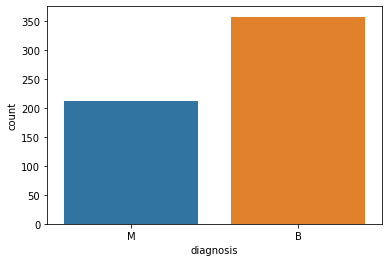

In [9]:
sns.countplot(x="diagnosis", data=df)

<AxesSubplot:>

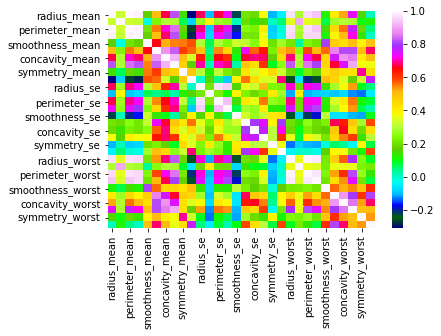

In [10]:
# Heatmap
sns.heatmap(df.corr(), cmap='gist_ncar')

### Data Test-train-Split

In [11]:
# Label preprocessing
features = df.loc[:, df.columns != 'diagnosis']
labels = df['diagnosis']

In [12]:
# Replacing categorical values with 0 and 1
labels.replace('B', 0, inplace=True)
labels.replace('M', 1, inplace=True)

In [13]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.1, random_state = 0)

### Model Compilation

In [14]:
model = Sequential()
# Adding the input layer and the first hidden layer
model.add(Dense(30, init='uniform', activation='relu', input_dim=30))
# Adding dropout to prevent overfitting
model.add(Dropout(p=0.1))
# Adding the second hidden layer
model.add(Dense(30, init='uniform', activation='relu'))
# Adding dropout to prevent overfitting
model.add(Dropout(p=0.1))
# Adding the output layer
model.add(Dense(1, init='uniform', activation='sigmoid'))

C:\Users\Sanket\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", input_dim=30, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sanket\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  """
C:\Users\Sanket\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  import sys
C:\Users\Sanket\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  if __name__ == '__main__':
C:\Users\Sanket\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API:

In [15]:
# Compiling model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
# Model training
model.fit(features_train, labels_train, batch_size=25, epochs=300)

Epoch 1/300
512/512 [==============================] - 0s 744us/step - loss: 0.6651 - accuracy: 0.5391
Epoch 2/300
512/512 [==============================] - 0s 109us/step - loss: 0.6101 - accuracy: 0.6797
Epoch 3/300
512/512 [==============================] - 0s 94us/step - loss: 0.4896 - accuracy: 0.8652
Epoch 4/300
512/512 [==============================] - 0s 78us/step - loss: 0.3972 - accuracy: 0.8613
Epoch 5/300
512/512 [==============================] - 0s 94us/step - loss: 0.3288 - accuracy: 0.8652
Epoch 6/300
512/512 [==============================] - 0s 94us/step - loss: 0.3064 - accuracy: 0.8926
Epoch 7/300
512/512 [==============================] - 0s 109us/step - loss: 0.2835 - accuracy: 0.8809
Epoch 8/300
512/512 [==============================] - 0s 109us/step - loss: 0.2691 - accuracy: 0.8965
Epoch 9/300
512/512 [==============================] - 0s 94us/step - loss: 0.2763 - accuracy: 0.8926
Epoch 10/300
512/512 [==============================] - 0s 109us/step - loss: 

512/512 [==============================] - 0s 109us/step - loss: 0.1791 - accuracy: 0.9316
Epoch 81/300
512/512 [==============================] - 0s 125us/step - loss: 0.1624 - accuracy: 0.9277
Epoch 82/300
512/512 [==============================] - 0s 125us/step - loss: 0.1652 - accuracy: 0.9238
Epoch 83/300
512/512 [==============================] - 0s 125us/step - loss: 0.1407 - accuracy: 0.9336
Epoch 84/300
512/512 [==============================] - 0s 109us/step - loss: 0.1475 - accuracy: 0.9277
Epoch 85/300
512/512 [==============================] - 0s 94us/step - loss: 0.1496 - accuracy: 0.9395
Epoch 86/300
512/512 [==============================] - 0s 109us/step - loss: 0.1457 - accuracy: 0.9336
Epoch 87/300
512/512 [==============================] - 0s 85us/step - loss: 0.1491 - accuracy: 0.9512
Epoch 88/300
512/512 [==============================] - 0s 98us/step - loss: 0.1693 - accuracy: 0.9277
Epoch 89/300
512/512 [==============================] - 0s 94us/step - loss: 0.1

Epoch 159/300
512/512 [==============================] - 0s 94us/step - loss: 0.1384 - accuracy: 0.9414
Epoch 160/300
512/512 [==============================] - 0s 94us/step - loss: 0.1332 - accuracy: 0.9414
Epoch 161/300
512/512 [==============================] - 0s 87us/step - loss: 0.1148 - accuracy: 0.9473
Epoch 162/300
512/512 [==============================] - 0s 98us/step - loss: 0.1443 - accuracy: 0.9453
Epoch 163/300
512/512 [==============================] - 0s 98us/step - loss: 0.1482 - accuracy: 0.9355
Epoch 164/300
512/512 [==============================] - 0s 94us/step - loss: 0.1186 - accuracy: 0.9531
Epoch 165/300
512/512 [==============================] - 0s 103us/step - loss: 0.1190 - accuracy: 0.9531
Epoch 166/300
512/512 [==============================] - 0s 82us/step - loss: 0.1691 - accuracy: 0.9141
Epoch 167/300
512/512 [==============================] - 0s 98us/step - loss: 0.1427 - accuracy: 0.9414
Epoch 168/300
512/512 [==============================] - 0s 98u

512/512 [==============================] - 0s 141us/step - loss: 0.1034 - accuracy: 0.9648
Epoch 238/300
512/512 [==============================] - 0s 125us/step - loss: 0.1007 - accuracy: 0.9453
Epoch 239/300
512/512 [==============================] - 0s 187us/step - loss: 0.1006 - accuracy: 0.9570
Epoch 240/300
512/512 [==============================] - 0s 187us/step - loss: 0.0904 - accuracy: 0.9551
Epoch 241/300
512/512 [==============================] - 0s 156us/step - loss: 0.1242 - accuracy: 0.9551
Epoch 242/300
512/512 [==============================] - 0s 141us/step - loss: 0.1117 - accuracy: 0.9512
Epoch 243/300
512/512 [==============================] - 0s 125us/step - loss: 0.1235 - accuracy: 0.9531
Epoch 244/300
512/512 [==============================] - 0s 94us/step - loss: 0.1080 - accuracy: 0.9512
Epoch 245/300
512/512 [==============================] - 0s 94us/step - loss: 0.1098 - accuracy: 0.9590
Epoch 246/300
512/512 [==============================] - 0s 94us/step -

In [17]:
features_test.shape

(57, 30)

In [18]:
# Saving model
model.save("breast_cancer.h5")

### Model prediction

In [19]:
loadedmodel = keras.models.load_model("breast_cancer.h5")

In [20]:
score = loadedmodel.evaluate(features_test, labels_test, verbose = 0) 

In [21]:
score

[0.18697734543106012, 0.8947368264198303]

In [22]:
pred = loadedmodel.predict(features_test)

In [23]:
pred

array([[9.9861085e-01],
       [2.4902353e-02],
       [2.9695086e-04],
       [7.3722780e-01],
       [1.2908389e-06],
       [3.1395353e-05],
       [2.1640672e-06],
       [4.6731611e-06],
       [1.0653873e-05],
       [3.0238189e-07],
       [4.0393665e-01],
       [6.1372179e-01],
       [3.2584185e-07],
       [8.8420981e-01],
       [3.7903970e-01],
       [9.9970311e-01],
       [8.8117922e-06],
       [1.0000000e+00],
       [9.9106616e-01],
       [1.0000000e+00],
       [9.9999905e-01],
       [9.7170728e-01],
       [6.1315158e-04],
       [1.6080759e-03],
       [9.9579489e-01],
       [2.5076425e-02],
       [2.7101669e-05],
       [6.9105536e-01],
       [1.1261667e-03],
       [1.0000000e+00],
       [8.1571461e-06],
       [1.0000000e+00],
       [5.4553747e-01],
       [9.9993682e-01],
       [1.8030050e-07],
       [9.9998963e-01],
       [3.5990879e-01],
       [9.9998140e-01],
       [4.9643338e-02],
       [9.9964082e-01],
       [9.7525352e-01],
       [6.755869

In [24]:
boolvalue = ['B' if x >= 0.5 else 'M' for x in pred]

In [25]:
boolvalue

['B',
 'M',
 'M',
 'B',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'B',
 'M',
 'B',
 'M',
 'B',
 'M',
 'B',
 'B',
 'B',
 'B',
 'B',
 'M',
 'M',
 'B',
 'M',
 'M',
 'B',
 'M',
 'B',
 'M',
 'B',
 'B',
 'B',
 'M',
 'B',
 'M',
 'B',
 'M',
 'B',
 'B',
 'M',
 'B',
 'M',
 'B',
 'B',
 'M',
 'M',
 'M',
 'B',
 'B',
 'M',
 'B',
 'M',
 'M',
 'M',
 'M']

In [26]:
labels_test

512    1
457    0
439    0
298    0
37     0
515    0
382    0
310    0
538    0
345    0
421    0
90     0
412    0
157    0
89     0
172    1
318    0
233    1
389    1
250    1
31     1
283    1
482    0
211    0
372    1
401    0
159    0
14     1
364    0
337    1
179    0
1      1
466    0
132    1
140    0
64     1
224    0
127    1
434    0
353    1
414    1
358    0
10     1
546    0
465    0
564    1
175    0
235    0
188    0
15     1
12     1
194    1
134    1
463    0
301    0
348    0
231    0
Name: diagnosis, dtype: int64